<center><h1 style="color:#173F8A;"> Algebra Lineal Numerica, IMT2111, 2022-1 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

# Randomized linear algebra

## Randomized SVD

In [126]:
import numpy as np
from numpy.random import randn
from numpy.linalg import qr, svd, norm
import scipy.sparse as sp

from matplotlib.pyplot import imshow, plot, axis
import matplotlib.pyplot as plt
from PIL import Image
plt.rcParams['figure.figsize'] = [32,12]
plt.rcParams.update({'font.size':18})
                                  

## Randomized Multiplication

In [114]:
m = 100
n = 100
p = 100

A = np.random.randn(m,n)
B = np.random.randn(n,p)

A = np.random.randint(10, size=(m,n))
B = np.random.randint(10, size=(n,p))
AB = A@B

In [133]:
# s = n; ks = np.arange(n)
s = 33
# sampleo uniforme
pk = 1.0/n
ks = np.random.randint(n,size=s)

# S = np.zeros((n,s))
# for j in range(s):
#     S[ks[j],j] = 1.0/np.sqrt(s*pk)
data = np.zeros(s)
row = np.zeros(s)
col = np.zeros(s)
for j in range(s):
    row[j] = ks[j]
    col[j] = j
    data[j] = 1.0/np.sqrt(s*pk)

S = sp.coo_matrix((data, (row, col)), shape = (n,s))
S = S.tocsr()

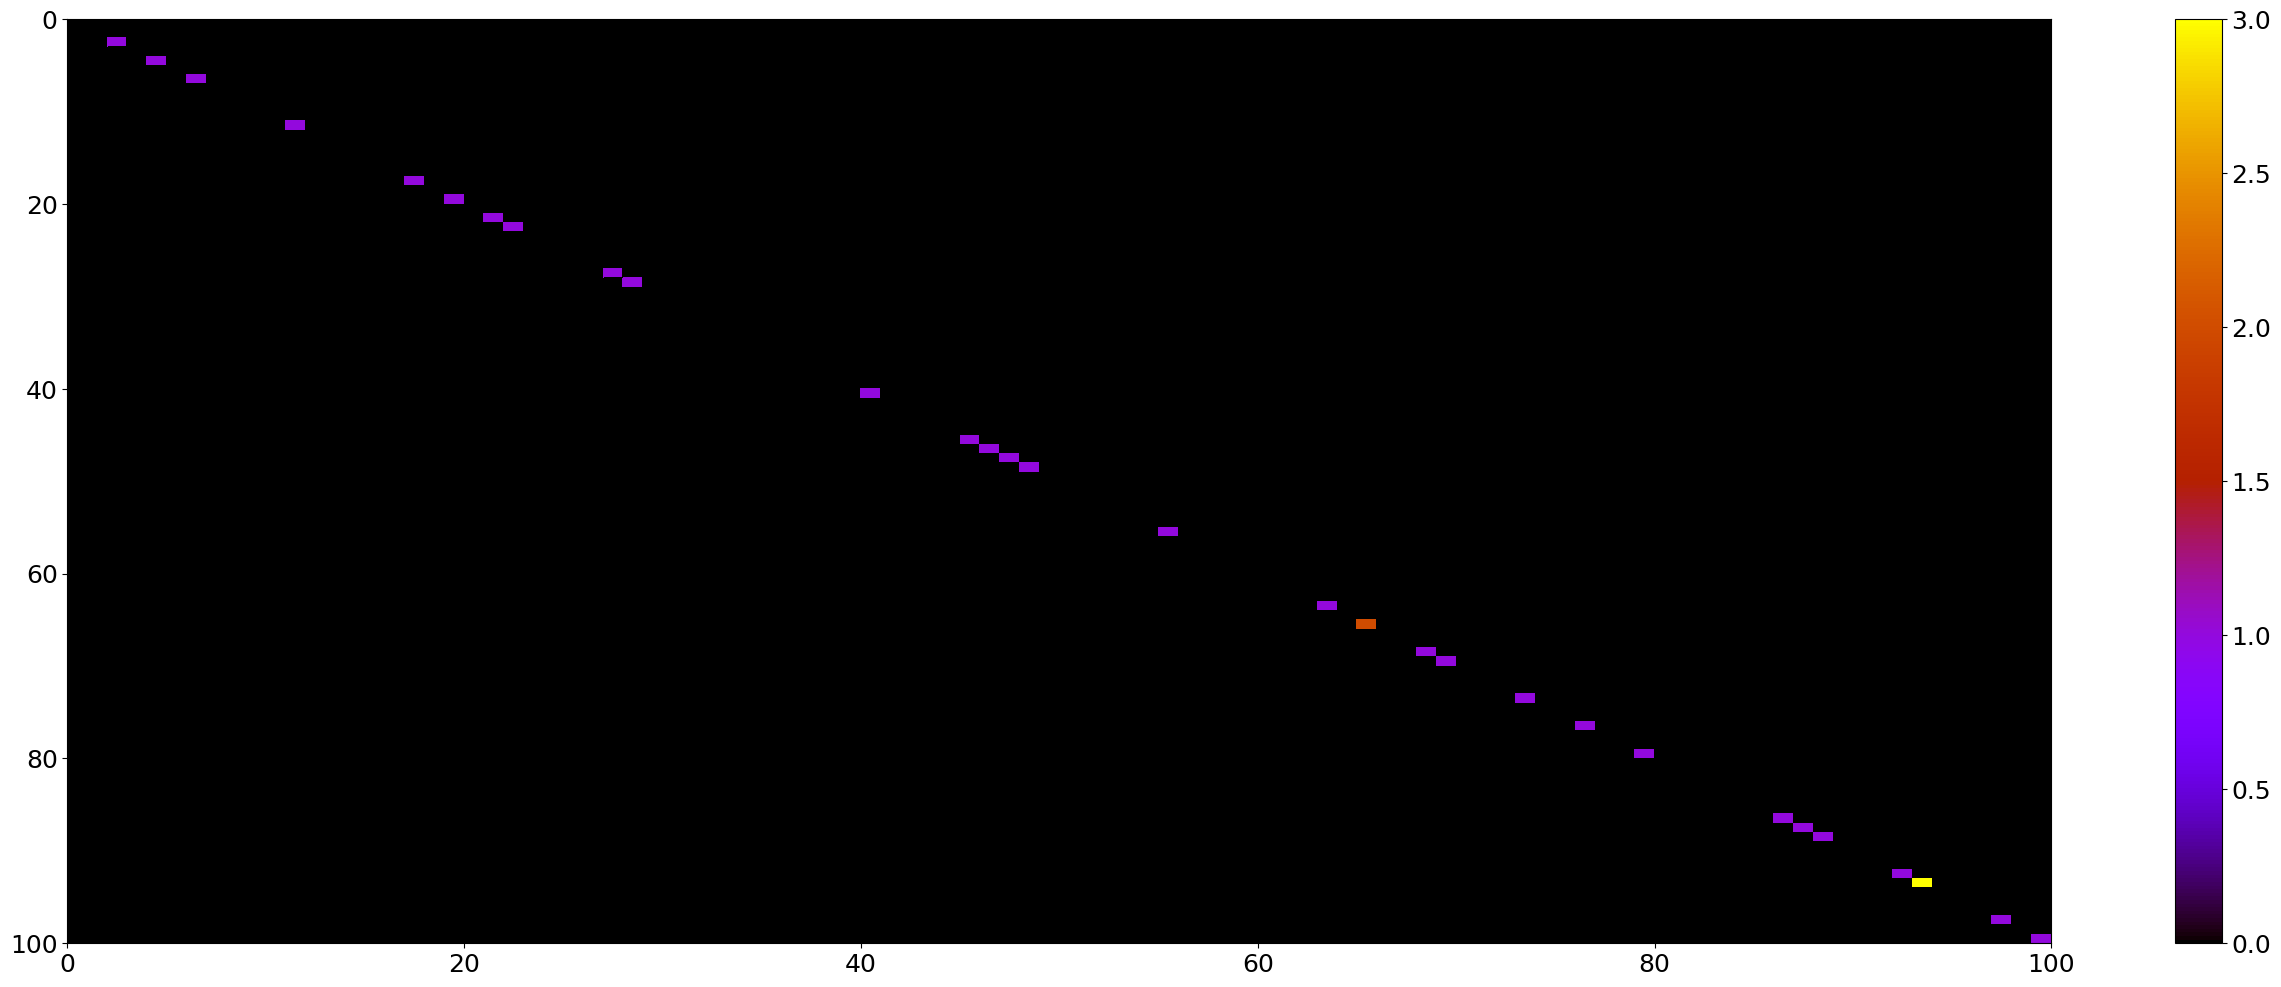

In [137]:
AUX = S@S.T
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.pcolor((s/n)*np.abs(AUX.toarray()), cmap='gnuplot')
ax.yaxis.set_inverted(True)  # inverted axis with autoscaling
fig.colorbar(plot)
plt.show()

In [138]:
np.linalg.norm(AB-(A@S)@(S.T@B))

32547.7599723488

**Sampleo que minimiza varianza**

In [118]:
norma_a_j = np.zeros(n)
norma_bT_j = np.zeros(n)
sum_naj_nbTj = 0
for j in range(n):
    norma_a_j[j] = np.linalg.norm(A[:,j])
    norma_bT_j[j] = np.linalg.norm(B[j,:])
    sum_naj_nbTj +=norma_a_j[j]*norma_bT_j[j]
pk = np.array([norma_a_j[j]*norma_a_j[j]/sum_naj_nbTj for j in range(n)])

In [119]:
s = 30
ks = np.random.randint(n,size=s)
S = np.zeros((n,s))
for j in range(s):
    S[ks[j],j] = 1.0/np.sqrt(s*pk[j])


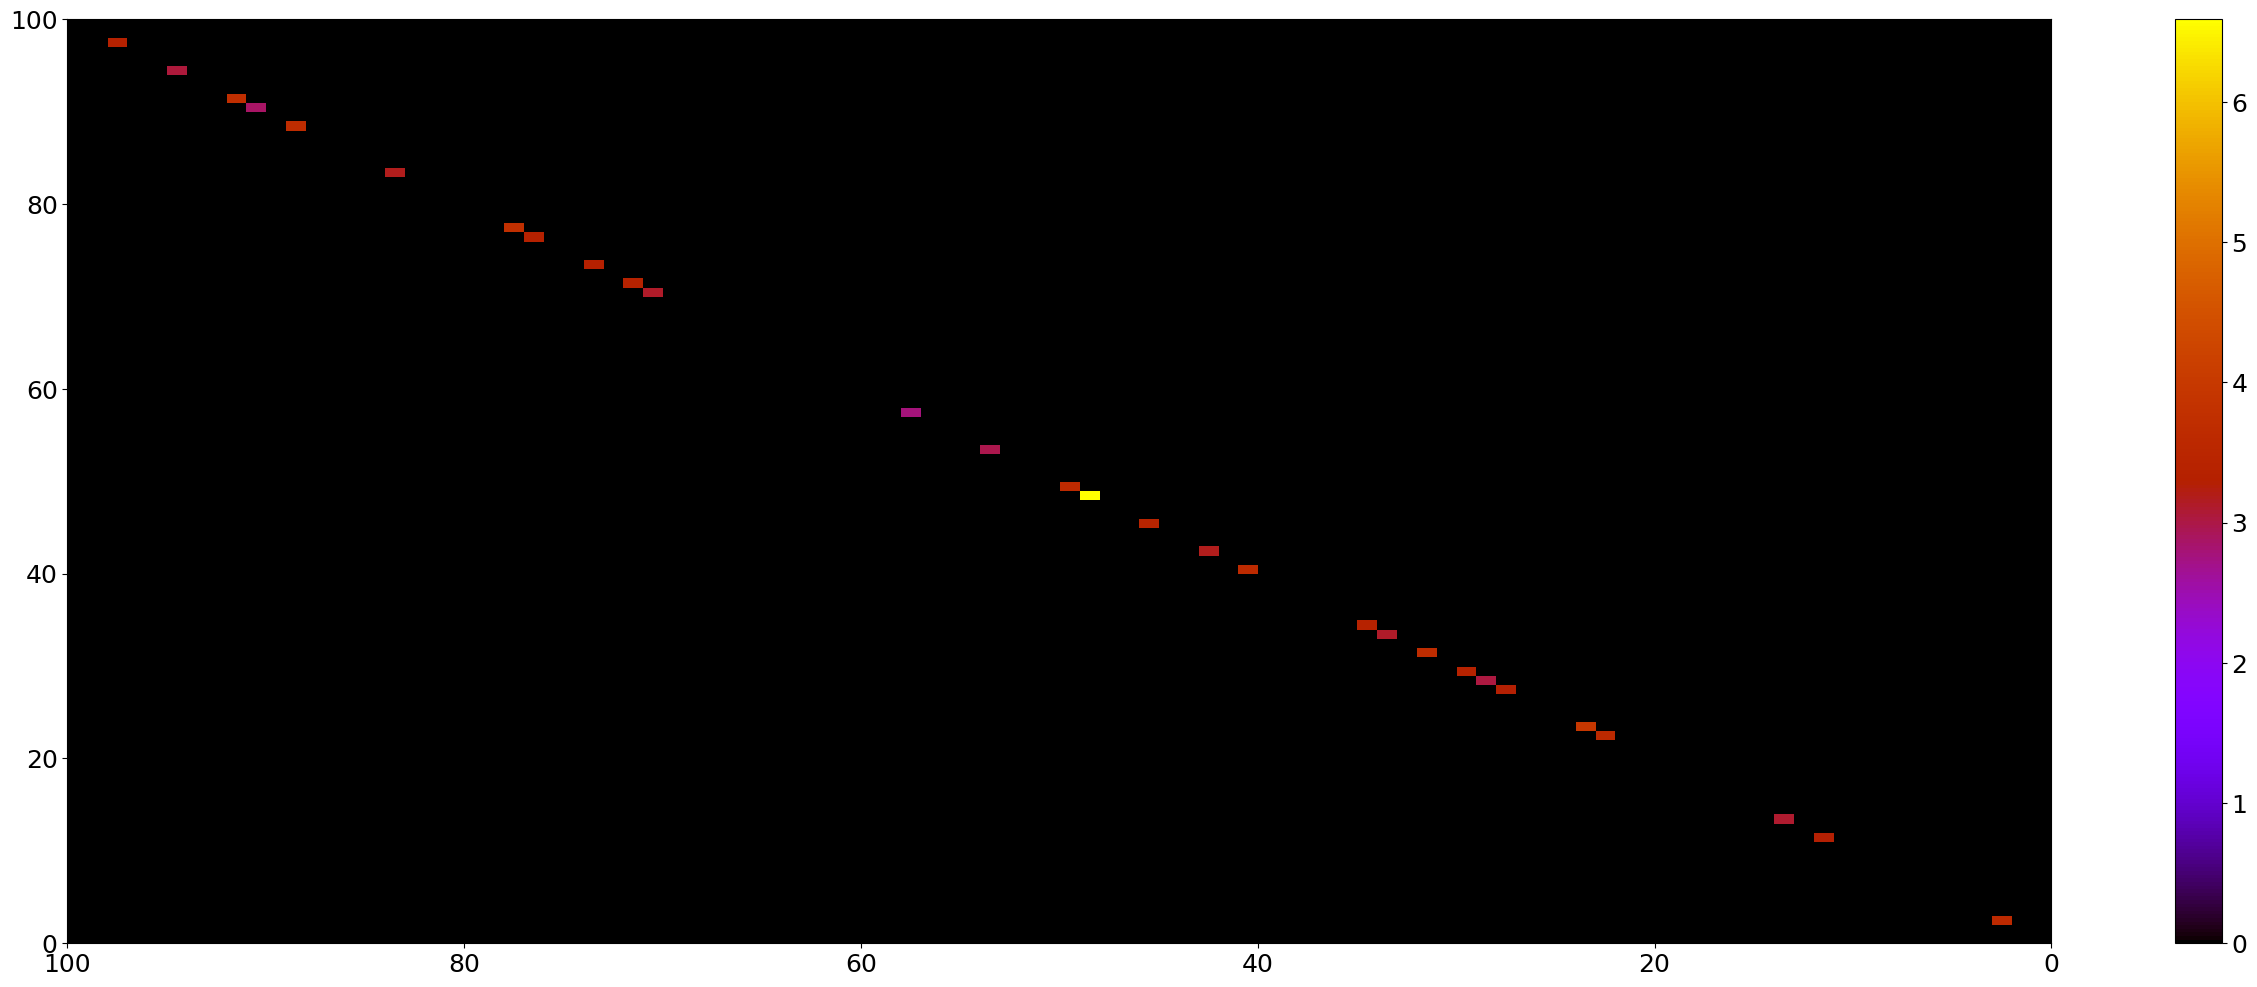

34138.85124694494

In [120]:
AUX = S@S.T
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.pcolor(np.abs(AUX), cmap='gnuplot')
ax.xaxis.set_inverted(True)  # inverted axis with autoscaling
fig.colorbar(plot)
plt.show()
np.linalg.norm(AB-(A@S)@(S.T@B))

## Randomized projections 

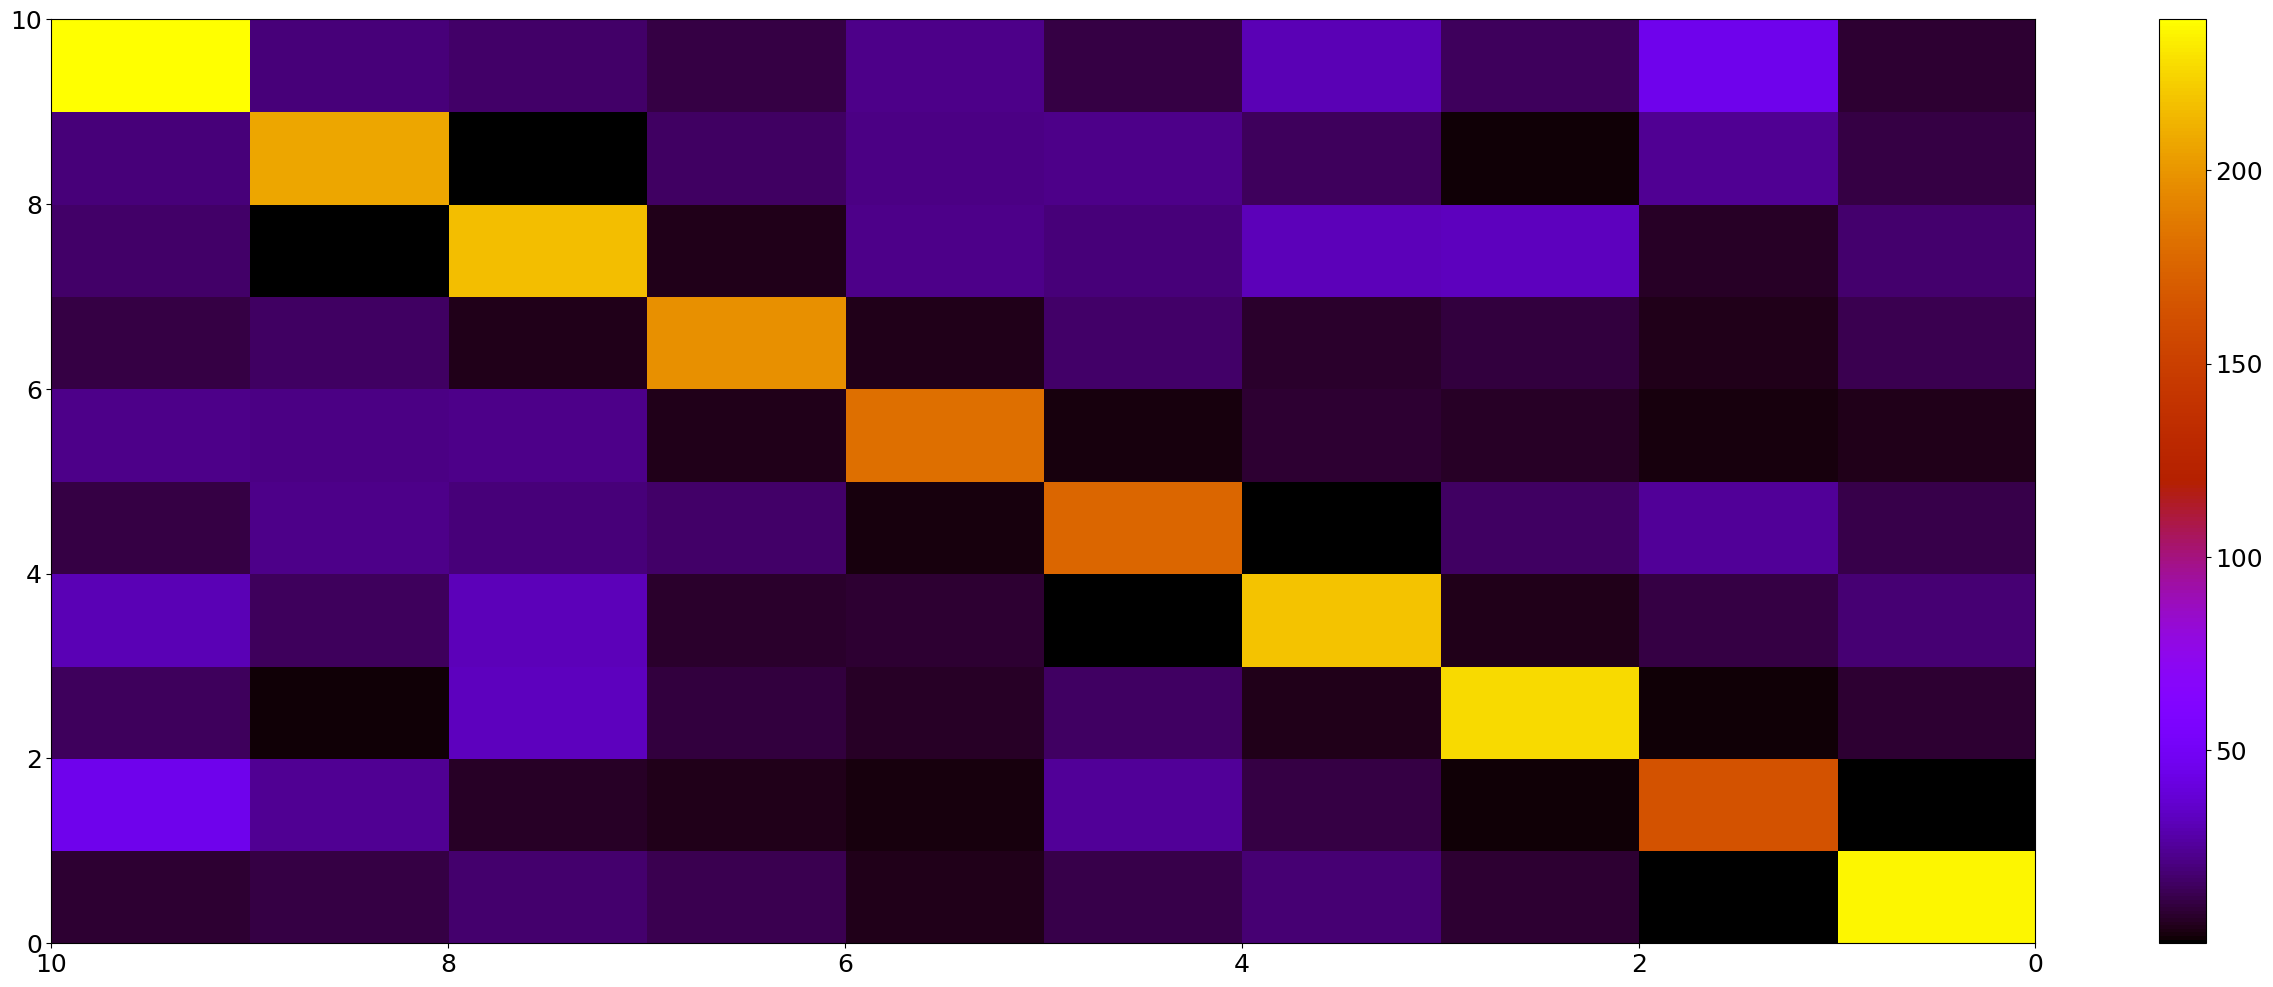

In [121]:
# Los vectores son ortogonales!

m=200
Omega = randn(m,10)
AUX = (Omega.T)@Omega
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.pcolor(np.abs(AUX), cmap='gnuplot')
ax.xaxis.set_inverted(True)  # inverted axis with autoscaling
fig.colorbar(plot)
plt.show()

In [2]:
# Randomized SVD
def rsvd(X,r,q=1,p = 5):
    # Input.  - X: matrix
    #         - r: rank of the approximation
    #         - q: number of power iteration
    #         - p: number of oversampling
    
    # Step 1: sample column space of X with P matrix
    ny = X.shape[1]
    P = randn(ny, r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)
    Q, R = qr(Z, mode='reduced')
    
    # Step 2 compute SVD on proyected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = svd(Y, full_matrices=0)
    U = Q @ UY
    return U, S, VT

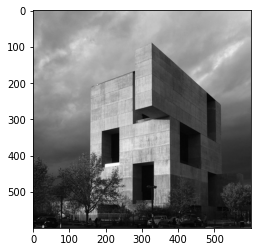

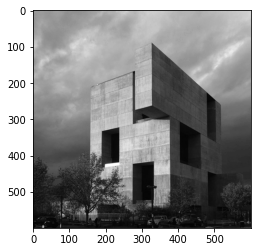

In [3]:
img = Image.open('edif_elemental.png')
#img = Image.open('The_Sun_in_high_resolution.jpg')
X = np.mean(img, axis=2)
imggray = img.convert('LA')
#plt.figure(figsize=(9, 6))
plt.imshow(imggray);

fig, axs = plt.subplots(1,1)
plt.set_cmap('gray')
axs.imshow(X-256)

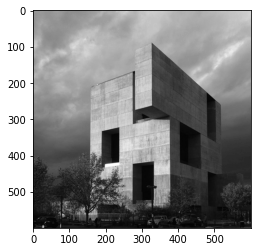

In [4]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
#plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');

In [5]:
Ufull, Sigmafull, Vfull = svd(imgmat, full_matrices=0)

In [6]:
r = 80

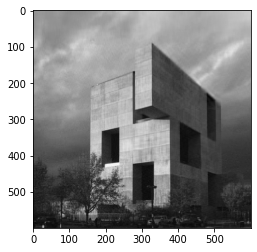

In [7]:
reconstimg = np.matrix(Ufull[:, :(r+1)]) * np.diag(Sigmafull[:(r+1)]) * np.matrix(Vfull[:(r+1), :])
plt.imshow(reconstimg, cmap='gray');
errSVD = norm(imgmat-reconstimg)/ norm(imgmat)

In [12]:
Ur, Sigmar, Vr = rsvd(imgmat, r,1,10)
print(Ur.shape, Sigmar.shape, Vr.shape)

(600, 90) (90,) (90, 600)


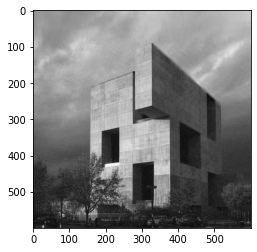

In [13]:
reconstimg_rand = np.matrix(Ur[:,:(r+1)]) * np.diag(Sigmar[:(r+1)]) * np.matrix(Vr[:(r+1),:])
plt.imshow(reconstimg_rand, cmap='gray');
errSVDr = norm(imgmat-reconstimg_rand)/ norm(imgmat)

In [86]:
print(errSVD, errSVDr)

0.033868919024786344 0.03546532652317805


# Color

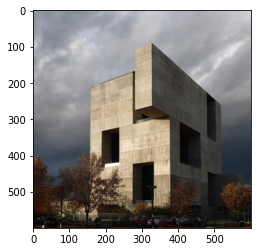

In [14]:
img = Image.open('edif_elemental.png');
#img = Image.open('Neptune_Full.jpeg');
imgRGB = img.convert('RGB')
imshow(imgRGB, interpolation='none');

# convert to matrix
#imgmat = np.array(list(imgRGB.getdata()), int)
imgmat = np.array(imgRGB)

plt.imshow(imgmat);

In [15]:
r=20

Cred = imgmat[:,:,0]
Cgreen = imgmat[:,:,1]
Cblue = imgmat[:,:,2]

Ured, sigmared, Vred = np.linalg.svd(Cred)
Ugreen, sigmagreen, Vgreen = np.linalg.svd(Cgreen)
Ublue, sigmablue, Vblue = np.linalg.svd(Cblue)

U = np.zeros((Ured.shape[0], Ublue.shape[1],3));
U[:,:,0] = Ured;
U[:,:,1] = Ugreen;
U[:,:,2] = Ublue;

sigma = np.zeros((sigmared.shape[0],3));
sigma[:,0] = sigmared;
sigma[:,1] = sigmagreen;
sigma[:,2] = sigmablue;

V = np.zeros((Vred.shape[0], Vblue.shape[1],3));
V[:,:,0] = Vred;
V[:,:,1] = Vgreen;
V[:,:,2] = Vblue;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


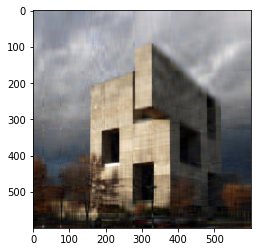

In [16]:
reconstimg = np.zeros(imgmat.shape)
for i in range(3):
    reconstimg[:,:,i] =  U[:, :(r+1),i] @ np.diag(sigma[:(r+1),i]) @ (V[:(r+1), :,i]) 

plt.imshow(reconstimg.astype(int)) 

In [17]:
# randomized


Ured_rand, sigmared_rand, Vred_rand = rsvd(Cred, r)
Ugreen_rand, sigmagreen_rand, Vgreen_rand = rsvd(Cgreen,r)
Ublue_rand, sigmablue_rand, Vblue_rand = rsvd(Cblue,r)

U_rand = np.zeros((Ured_rand.shape[0], Ublue_rand.shape[1],3));
U_rand[:,:,0] = Ured_rand
U_rand[:,:,1] = Ugreen_rand
U_rand[:,:,2] = Ublue_rand

sigma_rand = np.zeros((sigmared_rand.shape[0],3));
sigma_rand[:,0] = sigmared_rand
sigma_rand[:,1] = sigmagreen_rand
sigma_rand[:,2] = sigmablue_rand

V_rand = np.zeros((Vred_rand.shape[0], Vblue_rand.shape[1],3));
V_rand[:,:,0] = Vred_rand
V_rand[:,:,1] = Vgreen_rand
V_rand[:,:,2] = Vblue_rand

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


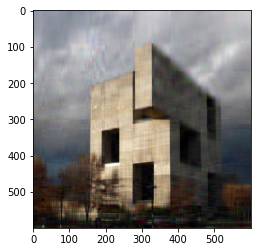

In [18]:
reconstimg_rand = np.zeros(imgmat.shape)
for i in range(3):
    reconstimg_rand[:,:,i] =  U_rand[:, :(r+1),i] @ np.diag(sigma_rand[:(r+1),i]) @ (V_rand[:(r+1), :,i]) 

plt.imshow(reconstimg_rand.astype(int)) 